# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [1]:
#!pip install lseg.data
#!pip install matplotlib
#!pip install seaborn

In [ ]:
import sys
print(sys.version)

3.11.13 | packaged by conda-forge | (main, Jun  4 2025, 14:52:34) [Clang 18.1.8 ]


In [2]:
import lseg.data as ld

In [3]:
ld.open_session()

<lseg.data.session.Definition object at 0x2780f889650 {name='workspace'}>

In [4]:
df = ld.get_data(
        universe=['TSLA.N', 'VOD.L'], 
        fields=['BID', 'ASK', 'TR.Revenue']
    )
print(df)

  Instrument      Revenue  BID  ASK
0     TSLA.N  97690000000    0    0
1      VOD.L  37448000000   86   89


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

### Numpy

In [6]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


In [7]:
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
arr[0][0]

1

In [8]:
type(arr)

numpy.ndarray

## Python Pandas

In [9]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
df


,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [10]:
#utilización de índice:
print(df.loc[1])

sesion        380
asistencia     20
Name: 1, dtype: int64


In [11]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])
df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [12]:
data = ld.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])

In [13]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,703.79,1562681,688.5,57.313693
1,IBM,242.55,3209773,240.34,12.598702
2,GOOG.O,200.19,13830146,197.46,5.369431
3,MSFT.O,505.72,27581974,504.44,20.440539


In [14]:
#data.to_parquet('data1.parquet.gzip',
#                  compression='gzip')
data = pd.read_parquet('data1.parquet.gzip')

In [15]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,695.0,1360257,682.0901,55.34892
1,IBM,240.07,5663562,236.2,11.447415
2,GOOG.O,203.03,19573041,198.64,6.864257
3,MSFT.O,520.58,19619160,519.37,23.979545


In [21]:
type(data)

pandas.core.frame.DataFrame

In [22]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [23]:
dax = ld.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])

In [24]:
#dax.to_parquet('dax.parquet.gzip',
#                  compression='gzip')
dax = pd.read_parquet('dax.parquet.gzip')

In [26]:
dax

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,45.87,2225025,13.306691
1,IFXGn.DE,Infineon Technologies AG,36.615,1996823,17.667943
2,SIEGn.DE,Siemens AG,233.25,659178,24.929257
3,EONGn.DE,E.ON SE,15.985,3613441,47.576671
4,DBKGn.DE,Deutsche Bank AG,31.425,4456875,91.032655
5,SATG_p.DE,Sartorius AG,197.0,123206,-8.407158
6,SAPG.DE,SAP SE,239.65,1095604,2.063876
7,BAYGn.DE,Bayer AG,26.63,1935706,39.423659
8,RWEG.DE,RWE AG,34.58,5536516,27.11406
9,HNKG_p.DE,Henkel AG & Co KGaA,71.62,447006,-12.573266


In [27]:
dax[0:5]

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,45.87,2225025,13.306691
1,IFXGn.DE,Infineon Technologies AG,36.615,1996823,17.667943
2,SIEGn.DE,Siemens AG,233.25,659178,24.929257
3,EONGn.DE,E.ON SE,15.985,3613441,47.576671
4,DBKGn.DE,Deutsche Bank AG,31.425,4456875,91.032655


In [28]:
dax.set_index('Instrument')['YTD Total Return']

Instrument
BASFn.DE      13.306691
IFXGn.DE      17.667943
SIEGn.DE      24.929257
EONGn.DE      47.576671
DBKGn.DE      91.032655
SATG_p.DE     -8.407158
SAPG.DE        2.063876
BAYGn.DE      39.423659
RWEG.DE        27.11406
HNKG_p.DE    -12.573266
ZALG.DE      -27.292374
DTEGn.DE       8.107441
MRCG.DE       -19.19863
PSHG_p.DE      6.195278
VOWG_p.DE     18.031972
BMWG.DE       18.504983
BEIG.DE      -17.782309
HEIG.DE       75.639894
RHMG.DE       161.16587
MTXGn.DE      19.378786
FMEG.DE       -0.955975
FREG.DE        39.01854
DHLn.DE       28.834272
ALVG.DE       29.897842
MUVGn.DE      18.638611
CONG.DE       18.322781
SHLG.DE       -7.686373
SY1G.DE      -21.895666
ADSGn.DE     -28.406442
HNRGn.DE      10.055332
DTGGe.DE      18.510564
ENR1n.DE      95.474395
MBGn.DE        6.275797
BNRGn.DE      -1.425524
CBKG.DE      140.274259
AIRG.DE       18.881012
VNAn.DE        0.059745
DB1Gn.DE      16.067633
QIA.DE        -1.637918
P911_p.DE    -17.918692
Name: YTD Total Return, dtype

In [29]:
dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]


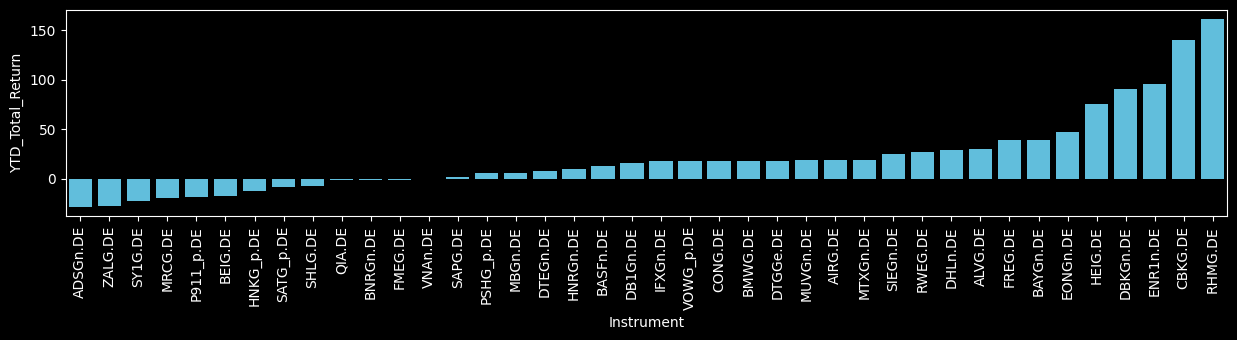

In [30]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

bar_plot = sns.barplot(x=dax2.index, y=dax2['YTD_Total_Return'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [25]:
type(dax2)

pandas.core.frame.DataFrame

### Generen grafico para volumen de menor a mayor DJI

In [26]:
lp4 = ld.get_data('LP40065886', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [27]:
lp4.to_parquet('lp4.parquet.gzip',
                  compression='gzip')
lp4 = pd.read_parquet('lp4.parquet.gzip')

In [28]:
lp4

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,LP40065886,MSFT.OQ,MICROSOFT CORP ORD,6.207,3767450.0,-17750.0
1,LP40065886,NVDA.OQ,NVIDIA CORP ORD,6.1481,11748800.0,-52958.0
2,LP40065886,AAPL.OQ,APPLE INC ORD,5.1446,7570312.0,-78637.0
3,LP40065886,AMZN.OQ,AMAZON.COM INC ORD,3.5189,4842521.0,-12928.0
4,LP40065886,META.OQ,META PLATFORMS INC ORD,2.6901,1100372.0,-14478.0
...,...,...,...,...,...,...
3177,LP40065886,LPCN.OQ,LIPOCINE INC ORD,0.0,3009.0,-1400.0
3178,LP40065886,FGEN.OQ,FIBROGEN INC ORD,0.0,2436.0,-58482.0
3179,LP40065886,,AMBIT BIOSCIENCES CORP CVR,0.0,29736.0,0.0
3180,LP40065886,,ALEXZA PHARMACEUTICALS INC CVR,0.0,80591.0,0.0


In [29]:
xle= ld.get_data('XLE', ['TR.FundHoldingRIC','TR.FundHoldingName', 'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares', 'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [30]:
xle.to_parquet('xle.parquet.gzip',
               compression='gzip')
xle = pd.read_parquet('xle.parquet.gzip')

In [31]:
xle

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,23.0299,56295820.0,-584164.0
1,XLE,CVX.N,CHEVRON CORP ORD,18.0806,32538942.0,4696365.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,7.483,21419230.0,-222115.0
3,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,4.4512,20262328.0,-210112.0
4,XLE,EOG.N,EOG RESOURCES INC ORD,4.4155,10039920.0,-104200.0
5,XLE,KMI.N,KINDER MORGAN INC ORD,3.9459,38376569.0,-398041.0
6,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,3.8034,6098701.0,-63169.0
7,XLE,OKE.N,ONEOK INC ORD,3.7309,12399894.0,-128562.0
8,XLE,SLB.N,SCHLUMBERGER NV ORD,3.6902,29794541.0,2513226.0
9,XLE,PSX.N,PHILLIPS 66 ORD,3.6627,8088239.0,-83928.0


In [32]:
xle.columns = [c.replace(' ', '_') for c in xle.columns]
list_values = ['USD CASH', 'OTHER ASSETS LESS LIABILITIES']
xle[~xle['Holding_Name'].isin(list_values)]

,Instrument,Holding_RIC,Holding_Name,Percentage_of_Fund_Assets,Number_of_Shares,Number_of_Shares_Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,23.0299,56295820.0,-584164.0
1,XLE,CVX.N,CHEVRON CORP ORD,18.0806,32538942.0,4696365.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,7.483,21419230.0,-222115.0
3,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,4.4512,20262328.0,-210112.0
4,XLE,EOG.N,EOG RESOURCES INC ORD,4.4155,10039920.0,-104200.0
5,XLE,KMI.N,KINDER MORGAN INC ORD,3.9459,38376569.0,-398041.0
6,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,3.8034,6098701.0,-63169.0
7,XLE,OKE.N,ONEOK INC ORD,3.7309,12399894.0,-128562.0
8,XLE,SLB.N,SCHLUMBERGER NV ORD,3.6902,29794541.0,2513226.0
9,XLE,PSX.N,PHILLIPS 66 ORD,3.6627,8088239.0,-83928.0


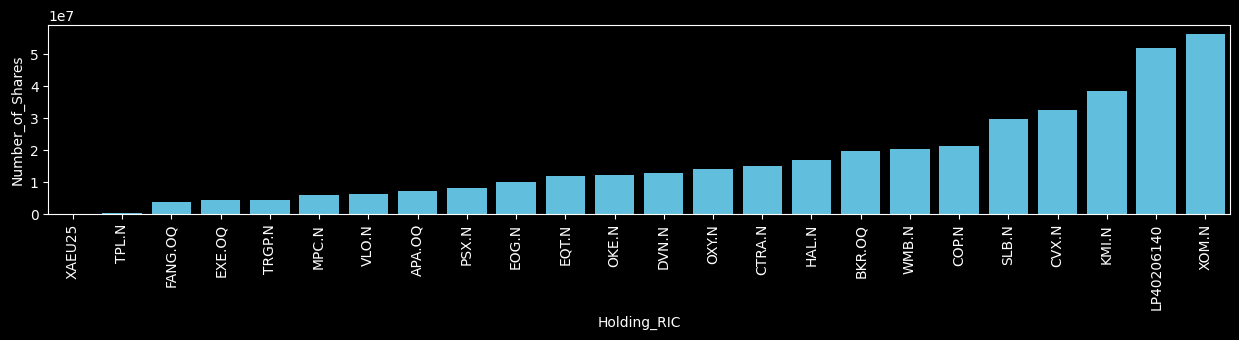

In [33]:
xle2 = xle[~xle['Holding_Name'].isin(list_values)].set_index('Holding_RIC')['Number_of_Shares'].sort_values().to_frame()
type(xle2)
bar_plot = sns.barplot(x=xle2.index, y=xle2['Number_of_Shares'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [34]:
help(ld.get_data)

Help on function get_data in module lseg.data._access_layer.get_data_func:

get_data(universe: Union[str, Iterable[str]], fields: Union[str, Iterable[str]], parameters: Union[str, dict, NoneType] = None, header_type: lseg.data.content._header_type.HeaderType = <HeaderType.TITLE: 2>) -> pandas.core.frame.DataFrame
    Retrieves pricing snapshots, as well as Fundamental and Reference data.
    
    Parameters
    ----------
    universe: str | list
        Instruments to request
    fields: str | list
        Fields to request
    parameters: str | dict, optional
        Single key=value global parameter or dictionary of global parameters to request
    header_type: HeaderType, default HeaderType.TITLE
        If HeaderType.TITLE - returns field title as column headers for data
        If HeaderType.NAME - returns field name as column headers for data
        If HeaderType.NAME_AND_TITLE - returns field name and title as column headers for data
    
    Returns
    -------
    pandas.Dat

# Descargar series de tiempo

In [35]:
help(ld.get_history)

Help on function get_history in module lseg.data._access_layer.get_history_func:

get_history(universe: Union[str, Iterable[str]], fields: Union[str, Iterable[str], NoneType] = None, interval: Optional[str] = None, start: 'OptDateTime' = None, end: 'OptDateTime' = None, adjustments: Optional[str] = None, count: Optional[int] = None, parameters: Union[str, dict, NoneType] = None, header_type: lseg.data.content._header_type.HeaderType = <HeaderType.TITLE: 2>) -> pandas.core.frame.DataFrame
    Retrieves the pricing history, as well as Fundamental and Reference data history.
    
    Parameters
    ----------
    universe: str | list
        Instruments to request
    fields: str | list, optional
        Fields to request
    interval: str, optional
        Date interval. Supported intervals are:
        tick, tas, taq, minute, 1min, 5min, 10min, 30min, 60min, hourly, 1h, daily,
        1d, 1D, 7D, 7d, weekly, 1W, monthly, 1M, quarterly, 3M, 6M, yearly, 1Y
    start: str or date or dateti

In [7]:
import datetime as dt
today = dt.date.today()
delta_day = today - dt.timedelta(days=365*5)
print(today, delta_day)

2025-09-30 2020-10-01


In [37]:
df_ts = ld.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = delta_day, end = today)

In [38]:
df_ts.to_parquet('df_ts.parquet.gzip',
               compression='gzip')
df_ts = pd.read_parquet('df_ts.parquet.gzip')

In [39]:
df_ts

000001.SZ,BID,ASK
Date,,
2025-05-07,11.02,11.03
2025-05-08,11.07,11.08
2025-05-09,11.14,11.15
2025-05-12,11.16,11.17
2025-05-13,11.29,11.3
...,...,...
2025-08-08,12.39,12.4
2025-08-11,12.3,12.31
2025-08-12,12.33,12.34


# Estadística Básica

In [41]:
portfolio = dax['Instrument'][0:10].tolist()
portfolio

['BASFn.DE',
 'IFXGn.DE',
 'SIEGn.DE',
 'EONGn.DE',
 'DBKGn.DE',
 'SATG_p.DE',
 'SAPG.DE',
 'BAYGn.DE',
 'RWEG.DE',
 'HNKG_p.DE']

In [5]:
portfolio = ['EXLS.OQ', '4901.T', '2301.TW', 'REL.L', 'MSFT.OQ',
             'ZOREN.IS', 'GWIND.IS', 'NATEN.IS', 'ESEN.IS', 'MAGEN.IS']

In [8]:
df_ts = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")

prices = df_ts.rename(columns={'Price Close': portfolio[0]})
prices

EXLS.OQ,EXLS.OQ
Date,
2020-10-01,13.172
2020-10-02,13.248
2020-10-05,13.546
2020-10-06,13.646
2020-10-07,13.57
...,...
2025-09-23,43.16
2025-09-24,43.64
2025-09-25,43.22


In [9]:
for i in [1,2,3]:
    print(i)

1
2
3


In [10]:
for i in portfolio[1:]:
    print(i)
    w = ld.get_history([i], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")
    w1 = w.rename(columns={'Price Close': i})
    prices = prices.join(w1, lsuffix="_left", rsuffix="_right")

4901.T
2301.TW
REL.L
MSFT.OQ
ZOREN.IS
GWIND.IS
NATEN.IS
ESEN.IS
MAGEN.IS


In [11]:
prices

,EXLS.OQ,4901.T,2301.TW,REL.L,MSFT.OQ,ZOREN.IS,GWIND.IS,NATEN.IS,ESEN.IS,MAGEN.IS
Date,,,,,,,,,,
2020-10-01,13.172,<NA>,<NA>,1722.5,212.46,1.420707,<NA>,1.447909,<NA>,<NA>
2020-10-02,13.248,1719.331614,<NA>,1747.0,206.19,1.426235,<NA>,1.510999,<NA>,<NA>
2020-10-05,13.546,1729.99827,45.8,1758.5,210.38,1.442819,<NA>,1.661625,<NA>,<NA>
2020-10-06,13.646,1714.998285,45.9,1727.0,205.91,1.470459,<NA>,1.788593,<NA>,<NA>
2020-10-07,13.57,1701.998298,45.4,1676.0,209.83,1.498099,<NA>,1.772821,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
2025-09-23,43.16,<NA>,183.0,3435.0,509.23,3.67,24.54,9.71,13.52,59.0
2025-09-24,43.64,3620.0,175.0,3454.0,510.15,3.66,26.18,9.61,13.37,58.0
2025-09-25,43.22,3599.0,172.0,3461.0,507.03,3.78,25.7,9.52,13.88,58.55


In [12]:
prices.describe()

,EXLS.OQ,4901.T,2301.TW,REL.L,MSFT.OQ,ZOREN.IS,GWIND.IS,NATEN.IS,ESEN.IS,MAGEN.IS
count,1254.0,1178.0,1171.0,1228.0,1254.0,1204.0,1066.0,1204.0,1198.0,964.0
mean,31.075061,2791.622871,85.693937,2753.224349,333.908222,3.016905,18.280266,6.368334,2.905569,16.558326
std,8.859318,528.504411,27.178778,718.696244,84.037572,1.659339,9.593341,4.312432,2.849713,11.702414
min,13.172,1701.998298,45.4,1527.5,202.33,0.871898,2.93147,1.205802,0.326764,2.846584
25%,25.4875,2353.33098,63.4,2223.0,259.4475,1.270068,6.653201,1.761636,1.132717,5.251034
50%,30.327,2819.99718,73.2,2504.0,319.1575,3.063754,21.920924,6.073169,2.327148,14.66
75%,35.3365,3187.91587,107.0,3486.25,410.84,4.36,26.296977,9.88,3.062415,22.66
max,51.8,3982.0,185.5,4135.0,535.64,7.01,36.056935,17.89,20.3,59.0


In [13]:
prices = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")


prices['Close'] = prices['Price Close'].astype(float)
prices[portfolio[0]] = np.log(prices['Close'].div(prices['Close'].shift(1)))
daily_returns = prices.drop(['Price Close', 'Close'], axis=1)
daily_returns 

EXLS.OQ,EXLS.OQ
Date,
2020-10-02,NaN
2020-10-09,0.056353
2020-10-16,0.032845
2020-10-23,0.041385
2020-10-30,0.003439
...,...
2025-08-29,-0.006148
2025-09-05,0.027041
2025-09-12,-0.031390


In [14]:
for instrument in range(1,len(portfolio)):
    print(instrument, portfolio[instrument])
    prices = ld.get_history([portfolio[instrument]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")
    prices['Close'] = prices['Price Close'].astype(float)
    prices[portfolio[instrument]] = np.log(prices['Close'].div(prices['Close'].shift(1)))
    prices = prices.drop(['Price Close', 'Close'], axis=1)
    daily_returns = daily_returns.join(prices)

1 4901.T
2 2301.TW
3 REL.L
4 MSFT.OQ
5 ZOREN.IS
6 GWIND.IS
7 NATEN.IS
8 ESEN.IS
9 MAGEN.IS


In [15]:
daily_returns

,EXLS.OQ,4901.T,2301.TW,REL.L,MSFT.OQ,ZOREN.IS,GWIND.IS,NATEN.IS,ESEN.IS,MAGEN.IS
Date,,,,,,,,,,
2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,0.056353,0.010415,NaN,-0.031398,0.045600,0.067441,NaN,0.042908,NaN,NaN
2020-10-16,0.032845,0.047583,0.007638,0.010284,0.017683,0.052922,NaN,-0.049716,0.474672,NaN
2020-10-23,0.041385,-0.012704,-0.009831,-0.045143,-0.015738,-0.056552,NaN,-0.029328,0.197945,NaN
2020-10-30,0.003439,-0.014746,0.021716,-0.068010,-0.065751,-0.103342,NaN,-0.147857,-0.003280,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-08-29,-0.006148,-0.025588,0.047253,-0.039265,-0.001065,-0.078422,-0.042528,-0.034820,-0.175346,0.022473
2025-09-05,0.027041,0.026976,0.003839,0.010393,-0.023342,-0.013245,-0.103282,-0.075623,0.060683,0.101814
2025-09-12,-0.031390,0.009382,0.222377,-0.012135,0.029657,-0.095044,-0.076795,-0.077216,0.024921,-0.080413


In [16]:
correlacion = daily_returns.corr()
print(correlacion)

           EXLS.OQ    4901.T   2301.TW     REL.L   MSFT.OQ  ZOREN.IS  \
EXLS.OQ   1.000000  0.273373  0.063428  0.380823  0.343161  0.127744   
4901.T    0.273373  1.000000  0.083887  0.205845  0.284593  0.075195   
2301.TW   0.063428  0.083887  1.000000  0.016183  0.126141  0.002806   
REL.L     0.380823  0.205845  0.016183  1.000000  0.320506  0.055302   
MSFT.OQ   0.343161  0.284593  0.126141  0.320506  1.000000 -0.069113   
ZOREN.IS  0.127744  0.075195  0.002806  0.055302 -0.069113  1.000000   
GWIND.IS  0.030960 -0.039819 -0.082450  0.018023 -0.109259  0.469071   
NATEN.IS  0.030435  0.009704 -0.100320  0.066334  0.074131  0.398809   
ESEN.IS  -0.028344  0.044402  0.014744 -0.031227  0.028744  0.176546   
MAGEN.IS -0.007150 -0.029356 -0.016275  0.061127 -0.076060  0.360159   

          GWIND.IS  NATEN.IS   ESEN.IS  MAGEN.IS  
EXLS.OQ   0.030960  0.030435 -0.028344 -0.007150  
4901.T   -0.039819  0.009704  0.044402 -0.029356  
2301.TW  -0.082450 -0.100320  0.014744 -0.016275  
REL

<Axes: >

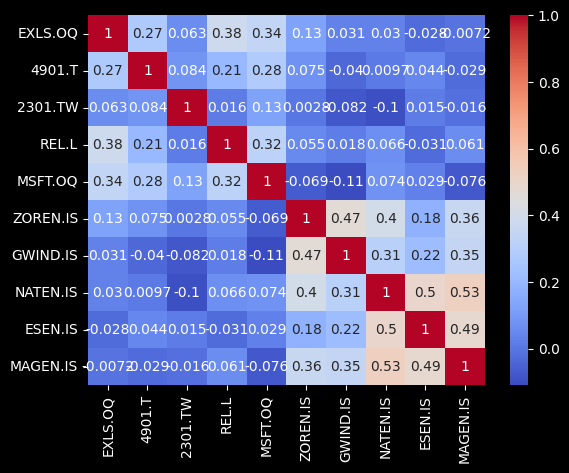

In [17]:
sns.heatmap(daily_returns.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [18]:
# Cálculo de estadísticas (por periodo) para cada activo y para el portafolio (pesos iguales)
# Usa las variables ya presentes: daily_returns, portfolio, correlacion

# pesos iguales
n = len(daily_returns.columns)
weights = np.repeat(1/n, n)

weights = np.array([0.09, 0.08, 0.09, 0.09, 0.18, 0.05, 0.10, 0.10, 0.10, 0.12])  # Pesos de la inversión inicial por activo (suma ≈ 1)


# Estadísticas por activo (esperado, varianza, desviación estándar)
asset_mean = daily_returns.mean()          # rendimiento esperado por periodo
asset_var  = daily_returns.var()           # varianza por periodo
asset_std  = daily_returns.std()           # desviación estándar por periodo

asset_stats = pd.DataFrame({
    'expected_return': asset_mean,
    'variance': asset_var,
    'std_dev': asset_std
})

# Estadísticas del portafolio
cov_matrix = daily_returns.cov()           # matriz de covarianza por periodo
portfolio_expected_return = weights @ asset_mean.values
portfolio_variance = weights @ cov_matrix.values @ weights
portfolio_std = np.sqrt(portfolio_variance)

portfolio_stats = pd.Series({
    'expected_return': portfolio_expected_return,
    'variance': portfolio_variance,
    'std_dev': portfolio_std
}, name='portfolio')

# Mostrar resultados
print("Estadísticas por activo (por periodo):")
display(asset_stats)

print("\nEstadísticas del portafolio (pesos iguales):")
display(portfolio_stats)

# Si se desea, devolver objetos para uso posterior
asset_stats, portfolio_stats

Estadísticas por activo (por periodo):


,expected_return,variance,std_dev
EXLS.OQ,0.004595,0.001590,0.039875
4901.T,0.003204,0.001217,0.034888
2301.TW,0.005485,0.001941,0.044053
REL.L,0.002811,0.000671,0.025904
MSFT.OQ,0.003494,0.001131,0.033633
ZOREN.IS,0.002850,0.004448,0.066691
GWIND.IS,0.007196,0.003928,0.062671
NATEN.IS,0.006642,0.006732,0.082048
ESEN.IS,0.015488,0.007444,0.086277
MAGEN.IS,0.013666,0.006567,0.081037



Estadísticas del portafolio (pesos iguales):


expected_return    0.006761
variance           0.000827
std_dev            0.028750
Name: portfolio, dtype: float64

(          expected_return  variance   std_dev
 EXLS.OQ          0.004595  0.001590  0.039875
 4901.T           0.003204  0.001217  0.034888
 2301.TW          0.005485  0.001941  0.044053
 REL.L            0.002811  0.000671  0.025904
 MSFT.OQ          0.003494  0.001131  0.033633
 ZOREN.IS         0.002850  0.004448  0.066691
 GWIND.IS         0.007196  0.003928  0.062671
 NATEN.IS         0.006642  0.006732  0.082048
 ESEN.IS          0.015488  0.007444  0.086277
 MAGEN.IS         0.013666  0.006567  0.081037,
 expected_return    0.006761
 variance           0.000827
 std_dev            0.028750
 Name: portfolio, dtype: float64)